Comparing HST observation times with JWST times.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
from astropy.convolution import convolve, Box1DKernel
from scipy.interpolate import interp1d
from astropy.time import Time
import astropy.units as u
from astropy import time, coordinates as coord
import astropy.constants as const
from astropy.modeling import models, fitting




#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [3]:
jwstpath = '/media/david/2tb_ext_hd/hddata/trappist-1_phot/jwst/MAST_2024-11-19T17_27_45.346Z/JWST/'
jwst_obs = glob.glob('{}*fits'.format(jwstpath))
# jwst_obs

In [13]:
hstpath = '/media/david/2tb_ext_hd/hddata/trappist-1_phot/'
flcs = glob.glob('{}epoch*/wfc3/*flc.fits'.format(hstpath))
# flcs
drzs = glob.glob('{}epoch*/acs/*drz.fits'.format(hstpath))


['/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch1/acs/jf3i02011_drz.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch1/acs/jf3i02021_drz.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/acs/jf3i04011_drz.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch2/acs/jf3i04021_drz.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/acs/jf3i06011_drz.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/acs/jf3i06021_drz.fits']

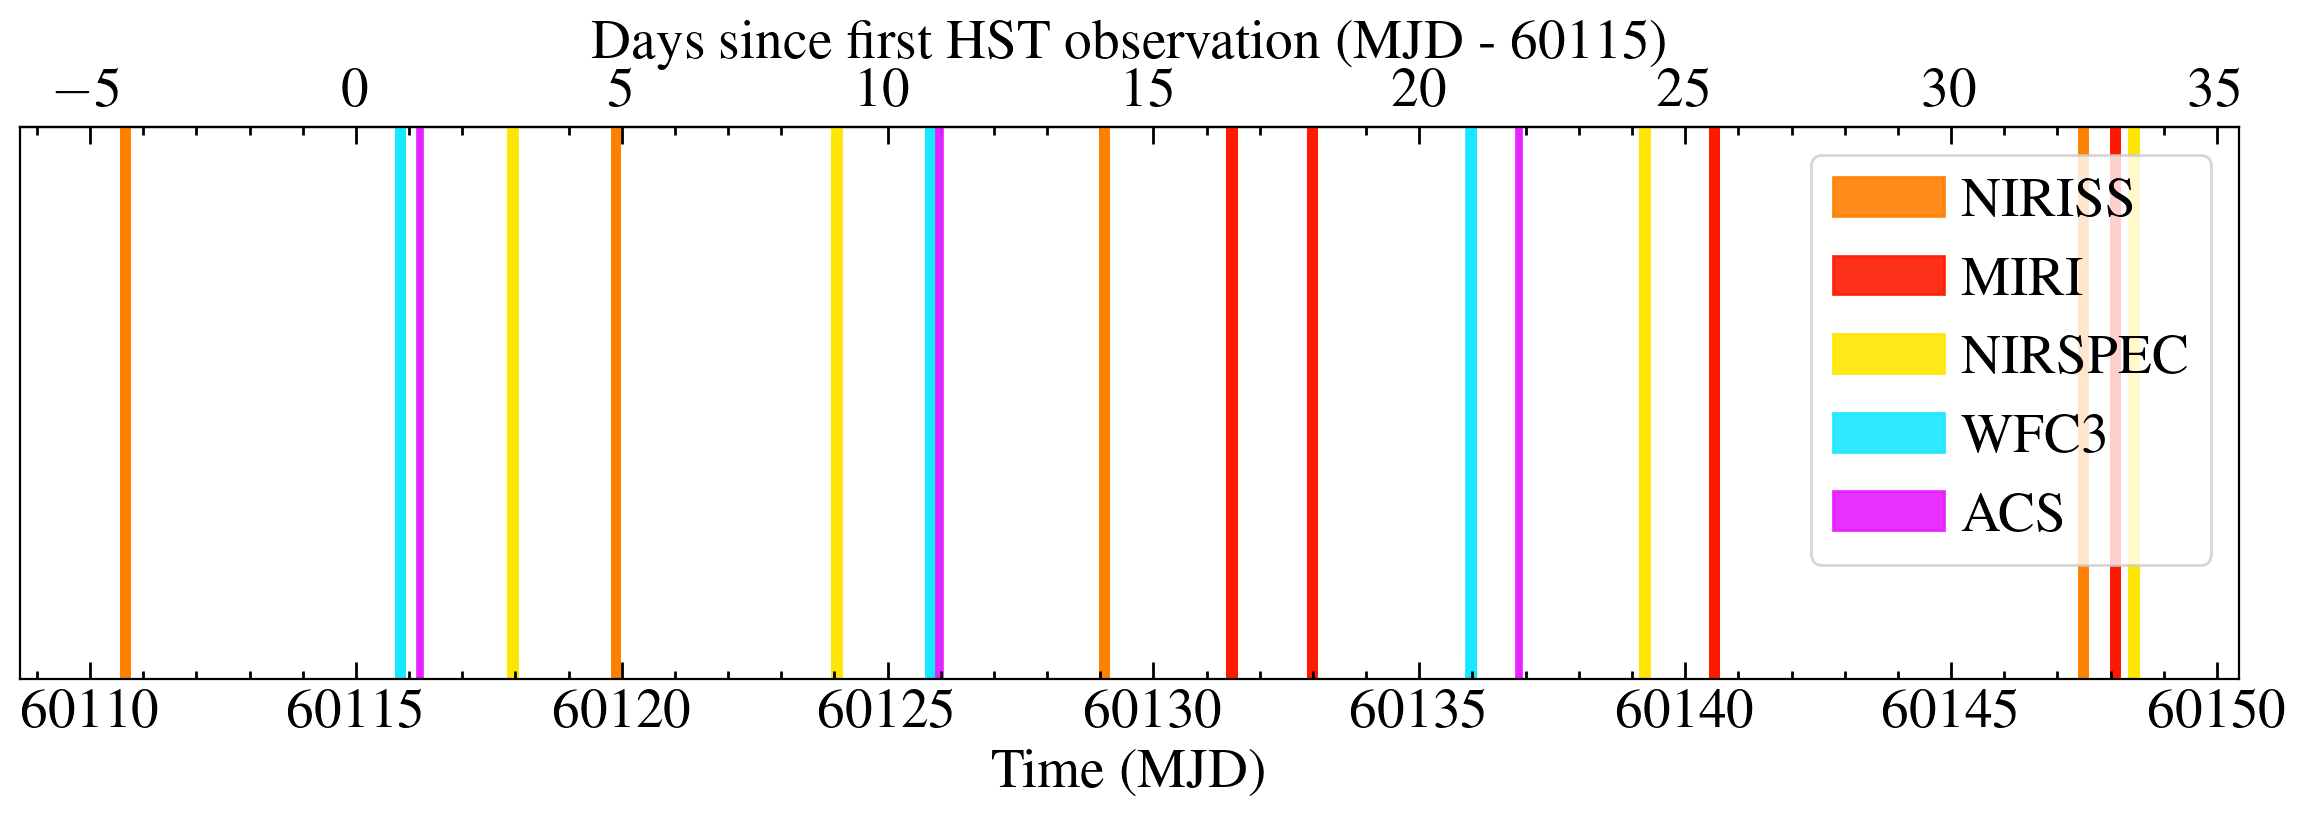

In [60]:
fig, ax = plt.subplots(figsize=(12, 4.5))

# jinsts = []

for jobs in jwst_obs:
    hdr = fits.getheader(jobs)
    tstart, tend, inst = hdr['DATE-BEG'], hdr['DATE-END'], hdr['INSTRUME']
    tstart, tend =  Time(tstart, format='isot', scale='utc'), Time(tend, format='isot', scale='utc')
    # c = 'C'
    # ax.plot([tstart.mjd, tend.mjd], [1, 1])
    # jinsts.append(inst)
    col = 0.9
    if inst == 'NIRISS':
        col = 0.5
    if inst == 'MIRI':
        col = 0.1
    ax.fill_betweenx([0, 1], tstart.mjd, tend.mjd, color=plt.cm.autumn(col), label = inst, alpha=0.9)
    
hstdays = []



for flc in flcs:
    hdr = fits.getheader(flc)
    tstart, tend = hdr['EXPSTART'], hdr['EXPEND'] #already in mjd
    ax.fill_betweenx([0, 1], tstart, tend, color=plt.cm.cool(0.1), label = 'WFC3',  alpha=0.9)
    hstdays.append(tstart)
    
    # ax.plot([tstart, tend], [2, 2])
    # ax.fill_betweenx([0, 1], tstart.mjd, tend.mjd)
    

for drz in drzs:
    hdr = fits.getheader(drz)
    tstart, tend = hdr['EXPSTART'], hdr['EXPEND'] #already in mjd
    # ax.plot([tstart, tend], [3, 3])
    ax.fill_betweenx([0, 1], tstart, tend, color=plt.cm.cool(0.9), label = 'ACS',  alpha=0.9)


handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), frameon=True, loc=1)




ax.set_yticks([])
ax.set_ylim(0.1, 0.9)
ax.set_xlabel('Time (MJD)')

hst1 = 60115


def t_to_s(y):
    return y-hst1

def s_to_t(y):
    return y+hst1

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    top=False)      # ticks along the bottom edge are off   
secax = ax.secondary_xaxis('top', functions =(t_to_s, s_to_t))
#secay.yaxis.set_minor_locator(AutoMinorLocator())
secax.set_xlabel('Days since first HST observation (MJD - {})'.format(hst1))


fig.tight_layout()
fig.savefig('plots/jwst_v_hst.pdf')

In [20]:
np.unique(jinsts)

array(['MIRI', 'NIRISS', 'NIRSPEC'], dtype='<U7')

In [37]:
print(min(hstdays))

60115.74853343


In [55]:
len(jinsts)

52